## Voice Recognition 

In [61]:
import pandas as pd
import matplotlib.pyplot as mpt
import seaborn as sb

In [62]:
data = pd.read_csv("Voice-Dataset.csv")

In [63]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [64]:
data.shape

(3168, 21)

In [65]:
sb.set()

In [66]:
def obj(x):
    if(x=='male'):
        x=0
        return x
    else:
        x=1
        return x

In [67]:
data['Gender'] = data['label'].apply(obj)

In [40]:
#we can also do it by the means of dictionary, when we do not want to apply the whole function.

In [68]:
data['Gender'].head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

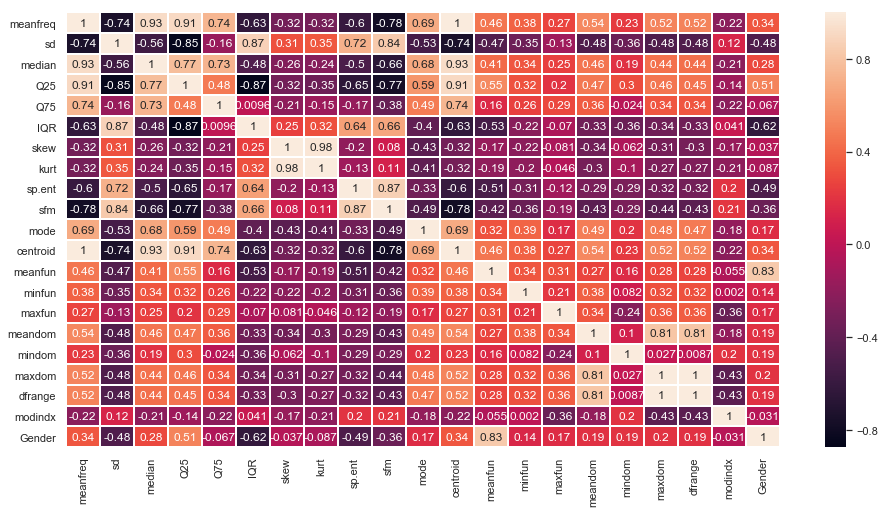

In [69]:
mpt.figure(figsize = (16,8))
sb.heatmap(data.corr(), annot=True, linecolor='w', linewidth=1)

In [70]:
training_data=data[['meanfun', 'IQR', 'Q25', 'sd', 'sp.ent', 'sfm']]

In [71]:
output_data=data['Gender']

In [72]:
from sklearn.model_selection import train_test_split

In [98]:
X, x_test, Y, y_test = train_test_split(training_data, output_data, test_size=0.3, random_state=42) 


In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model = LogisticRegression()

In [87]:
model.fit(X,Y)

C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
predictions = model.predict(x_test)

In [78]:
predictions[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [80]:
confusion_matrix(predictions, y_test)               

array([[484,  67],
       [ 15, 385]], dtype=int64)

In [81]:
score = accuracy_score(predictions, y_test)
score           

0.9137749737118822

### Through KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn_model = KNeighborsClassifier()

In [99]:
knn_model.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [100]:
knn_predictions = knn_model.predict(x_test)

In [101]:
knn_score = accuracy_score(knn_predictions, y_test)
knn_score

0.9800210304942166

### Grid Search

In [102]:
from sklearn.model_selection import GridSearchCV

In [106]:
parameters = {'n_neighbors':[5, 10, 15, 13]}

In [107]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=parameters)

In [108]:
grid_search.fit(X,Y)

C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [5, 10, 15, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
grid_search.best_params_

{'n_neighbors': 5}

In [110]:
grid_search.best_score_

0.9711321605773567

### Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
dt_model = DecisionTreeClassifier()

In [114]:
dt_model.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [115]:
dt_predictions = dt_model.predict(x_test)

In [117]:
dt_score = accuracy_score(dt_predictions, y_test)
dt_score

0.9579390115667719

#### Using grid search and then finding out the best.

In [118]:
from sklearn.svm import SVC                #SupportVirtualMachine, SportsVirtualC

In [119]:
svm_model = SVC()

In [120]:
svm_model.fit(X,Y)

C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [121]:
svm_predictions = svm_model.predict(x_test)

In [123]:
svm_score = accuracy_score(svm_predictions, y_test)
svm_score

0.907465825446898

In [124]:
svm_parameters = {
    'C':[0.01, 0.1, 1, 10, 100]
}

In [125]:
grid_search_svm = GridSearchCV(SVC(kernel='rbf'), param_grid=svm_parameters)

In [126]:
grid_search_svm.fit(X,Y)

C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [127]:
grid_search_svm.best_params_

{'C': 100}

In [128]:
grid_search_svm.best_score_

0.9661705006765899